# 📊 Tendencias de Texto Web con Python

Este notebook es un experimento personal donde utilizo Python para:
- Obtener contenido textual de un artículo web (scraping)
- Procesar y limpiar el texto
- Analizar las palabras más frecuentes
- Visualizar los resultados con gráficos y nube de palabras

Este análisis puede ser útil para detectar temas recurrentes, crear resúmenes automáticos o entrenar modelos de lenguaje.

---

## Carga de librerías

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Scraping del artículo

In [2]:
def fetch_article(url):
    try:
        response = requests.get(url)
        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            return ""
        soup = BeautifulSoup(response.text, "html.parser")
        paragraphs = soup.find_all("p")
        text = " ".join([p.get_text() for p in paragraphs])
        return text

    except Exception as e:
        print("Error al obtener el artículo:", e)
        return ""

In [3]:
# URL de ejemplo
url = "http://bbc.com/mundo/articles/c04551g4nk9o"
text = fetch_article(url)

# Preview del texto
print(text[:500])


Fuente de la imagen, Getty Images Durante días, Donald Trump y su equipo de la Casa Blanca insistieron en su firme compromiso con su decisión de imponer aranceles "recíprocos" generalizados a docenas de países.  Incluso ridiculizaron una información surgida el martes que indicaba que el presidente estaba considerando una pausa de 90 días para los aranceles, noticia que desencadenó un breve repunte en la bolsa. Pero ahora esa pausa de 90 días en el aumento de los aranceles, con algunas excepcione


## Limpieza y análisis

In [4]:
def clean_text(raw_text):
    raw_text = raw_text.lower()
    raw_text = re.sub(r"[^a-záéíóúñ\s]", "", raw_text)
    words = raw_text.split()
    stopwords = {
        "de",
        "la",
        "que",
        "el",
        "en",
        "los",
        "las",
        "por",
        "del",
        "se",
        "con",
        "una",
        "como",
        "más",
        "para",
        "sus",
        "entre",
        "pero",
    }
    words = [word for word in words if word not in stopwords and len(word) > 3]
    return words


def count_words(words):
    return Counter(words).most_common(20)

In [5]:
words = clean_text(text)
word_frequency = count_words(words)
word_frequency

[('trump', 14),
 ('aranceles', 10),
 ('está', 9),
 ('días', 5),
 ('casa', 5),
 ('blanca', 5),
 ('presidente', 5),
 ('comercial', 4),
 ('semana', 4),
 ('fuente', 3),
 ('imagen', 3),
 ('getty', 3),
 ('images', 3),
 ('durante', 3),
 ('decisión', 3),
 ('países', 3),
 ('pausa', 3),
 ('china', 3),
 ('estadounidense', 3),
 ('prensa', 3)]

## Visualización

In [6]:
def graph_bars(word_counts):
    words, frecs = zip(*word_counts)
    plt.figure(figsize=(10, 5))
    plt.bar(words, frecs)
    plt.xticks(rotation=45)
    plt.title("Palabras más frecuentes")
    plt.tight_layout()
    plt.show()


def generate_word_cloud(words):
    texto = " ".join(words)
    cloud = WordCloud(width=800, height=400, background_color="white").generate(texto)
    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nube de palabras")
    plt.show()

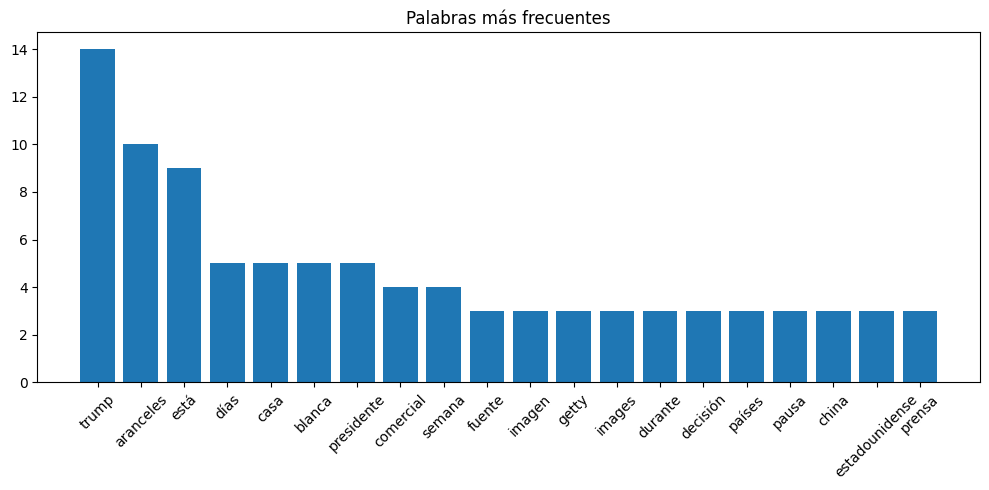

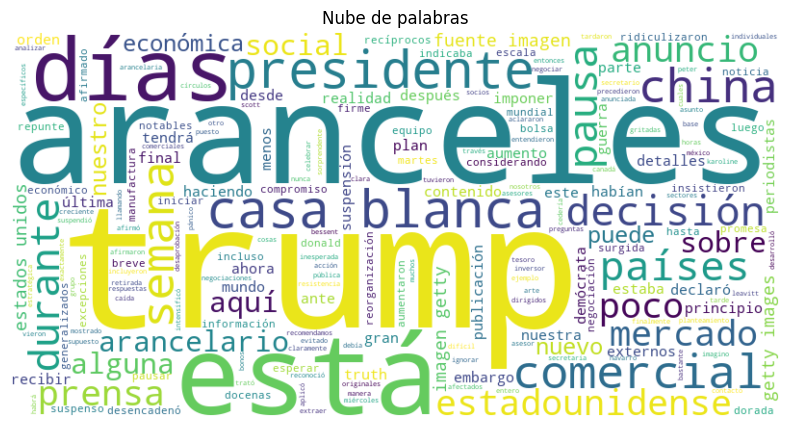

In [7]:
graph_bars(word_frequency)
generate_word_cloud(words)

## ✅ Conclusiones

- Se detectaron las palabras clave más frecuentes del artículo analizado.
- Las visualizaciones muestran de forma intuitiva los temas principales.
- Este proceso puede repetirse con otros artículos para encontrar tendencias.

### 🚀 Próximos pasos:
- Guardar los resultados como archivo CSV o JSON
- Analizar varios artículos y comparar palabras comunes
- Aplicar técnicas de lematización y detección de entidades (NER)
- Integrar este análisis en una app web con FastAPI o Streamlit

---